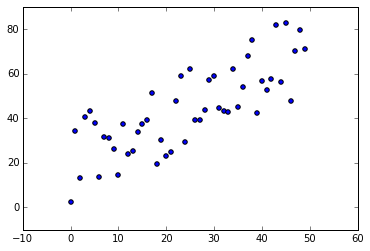

In [8]:
import scipy

x = numpy.array(range(0,50))
y = numpy.random.uniform(low=0.0, high=40.0, size=200)
y = map((lambda a: a[0] + a[1]), zip(x,y))

import matplotlib.pyplot as plt
plt.scatter(x,y)

/usr/local/lib/python2.7/dist-packages/theano/gof/cmodule.py:293: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  rval = __import__(module_name, {}, {}, [module_name])


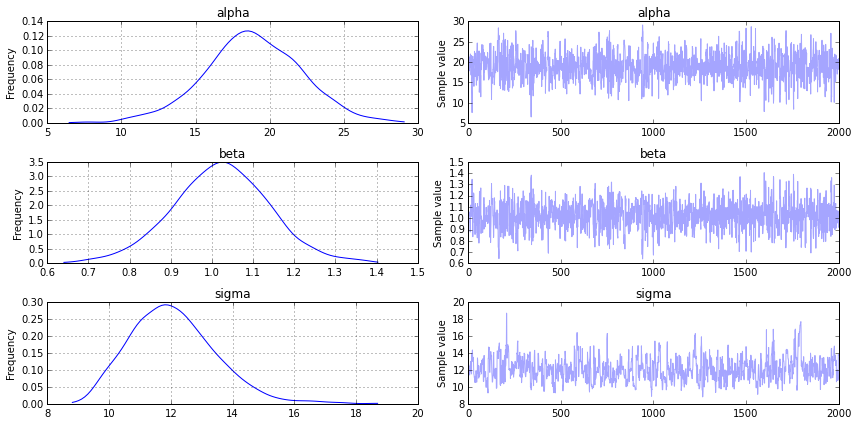

In [10]:
import pymc3 as pm
import numpy as np

trace = None
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)
    
    y_est = alpha + beta * x
    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(2000, step, start=start, progressbar=False)
    
    pm.traceplot(trace);

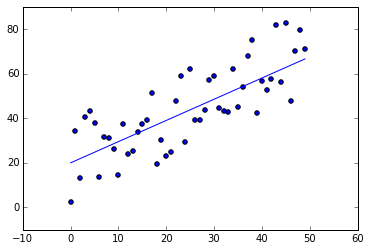

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    
plt.scatter(x,y)

graph('20 + .95*x', range(0,50))

plt.show()